# Lending Club Case Study

[Kantajit Shaw](https://www.linkedin.com/in/kantajitshaw) & [Paresh Pradhan](https://www.linkedin.com/in/paresh-pradhan/)

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import warnings
warnings.filterwarnings('ignore')

### Reading Dataset

In [2]:
loan_df = pd.read_csv('loan.csv')

### Checking the details of the dataset

In [3]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


There are **39717 rows** and **111 columns** containing **consumer attributes** and **loan attributes**.

##### Null value analysis

Column-wise

In [4]:
dict((loan_df.isnull().sum()/len(loan_df.index)*100).sort_values(ascending=False))

{'verification_status_joint': 100.0,
 'annual_inc_joint': 100.0,
 'mo_sin_old_rev_tl_op': 100.0,
 'mo_sin_old_il_acct': 100.0,
 'bc_util': 100.0,
 'bc_open_to_buy': 100.0,
 'avg_cur_bal': 100.0,
 'acc_open_past_24mths': 100.0,
 'inq_last_12m': 100.0,
 'total_cu_tl': 100.0,
 'inq_fi': 100.0,
 'total_rev_hi_lim': 100.0,
 'all_util': 100.0,
 'max_bal_bc': 100.0,
 'open_rv_24m': 100.0,
 'open_rv_12m': 100.0,
 'il_util': 100.0,
 'total_bal_il': 100.0,
 'mths_since_rcnt_il': 100.0,
 'open_il_24m': 100.0,
 'open_il_12m': 100.0,
 'open_il_6m': 100.0,
 'open_acc_6m': 100.0,
 'tot_cur_bal': 100.0,
 'tot_coll_amt': 100.0,
 'mo_sin_rcnt_rev_tl_op': 100.0,
 'mo_sin_rcnt_tl': 100.0,
 'mort_acc': 100.0,
 'num_rev_tl_bal_gt_0': 100.0,
 'total_bc_limit': 100.0,
 'total_bal_ex_mort': 100.0,
 'tot_hi_cred_lim': 100.0,
 'percent_bc_gt_75': 100.0,
 'pct_tl_nvr_dlq': 100.0,
 'num_tl_op_past_12m': 100.0,
 'num_tl_90g_dpd_24m': 100.0,
 'num_tl_30dpd': 100.0,
 'num_tl_120dpd_2m': 100.0,
 'num_sats': 100.0,
 'n

There are many columns which doesn't contain any non-null values. Those won't contribute much knowledge for EDA

Filtering out those columns in the next cell

In [5]:
loan_df = loan_df.loc[:,loan_df.notnull().sum()!=0]
loan_df.shape

(39717, 57)

In [6]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

Removing columns with only one unique value

In [7]:
loan_df = loan_df.drop(['tax_liens','application_type','pymnt_plan','policy_code','collections_12_mths_ex_med','delinq_amnt','chargeoff_within_12_mths','initial_list_status','acc_now_delinq',],axis=1)

In [8]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [9]:
loan_df.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

There are 3 types of loans
1. Fully Paid
2. Charged Off
3. Current

In out analysis, we will only use **Fully Paid** and **Charged Off** loans.
As we don't know loan status of the **Current** loans. So, these rows will be dropped.

In [10]:
loan_df=loan_df[loan_df['loan_status']!='Current']
loan_df.shape

(38577, 48)

In next cell another column is created to indicate whether the account has defaulted or not.

In [11]:
loan_df['default']=loan_df.loan_status.apply(lambda x:1 if x=='Charged Off' else 0)

In [12]:
loan_df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,default
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,632.21,0.00,0.00,0.00,Jan-15,161.03,NaN,Jan-16,0.0,0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,3125.23,0.00,0.00,0.00,May-16,1313.76,NaN,May-16,0.0,0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,939.14,0.00,0.00,0.00,Jan-15,111.34,NaN,Dec-14,0.0,0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,294.94,0.00,189.06,2.09,Apr-12,152.39,NaN,Aug-12,0.0,1
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,533.42,0.00,269.29,2.52,Nov-12,121.45,NaN,Mar-13,0.0,1
10,1070078,1305201,6500,6500,6500.0,60 months,14.65%,153.45,C,C3,...,1178.02,0.00,0.00,0.00,Jun-13,1655.54,NaN,Dec-15,0.0,0


In [13]:
loan_df['int_rate'] = loan_df.int_rate.apply(lambda x:float(x[:-1]))

In [14]:
loan_df['term'] = loan_df.term.apply(lambda x:int(x.strip()[:2]))

In [15]:
loan_df['sub_grade_no'] = loan_df.sub_grade.apply(lambda x:int(x[1]))

<AxesSubplot:xlabel='grade'>

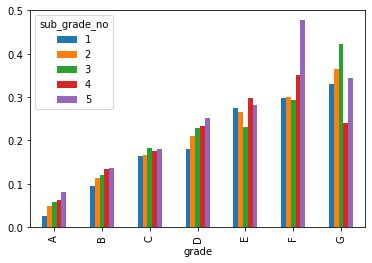

In [16]:
pd.pivot_table(loan_df,index=['grade'],columns=['sub_grade_no'],values='default',aggfunc=np.mean).plot.bar()

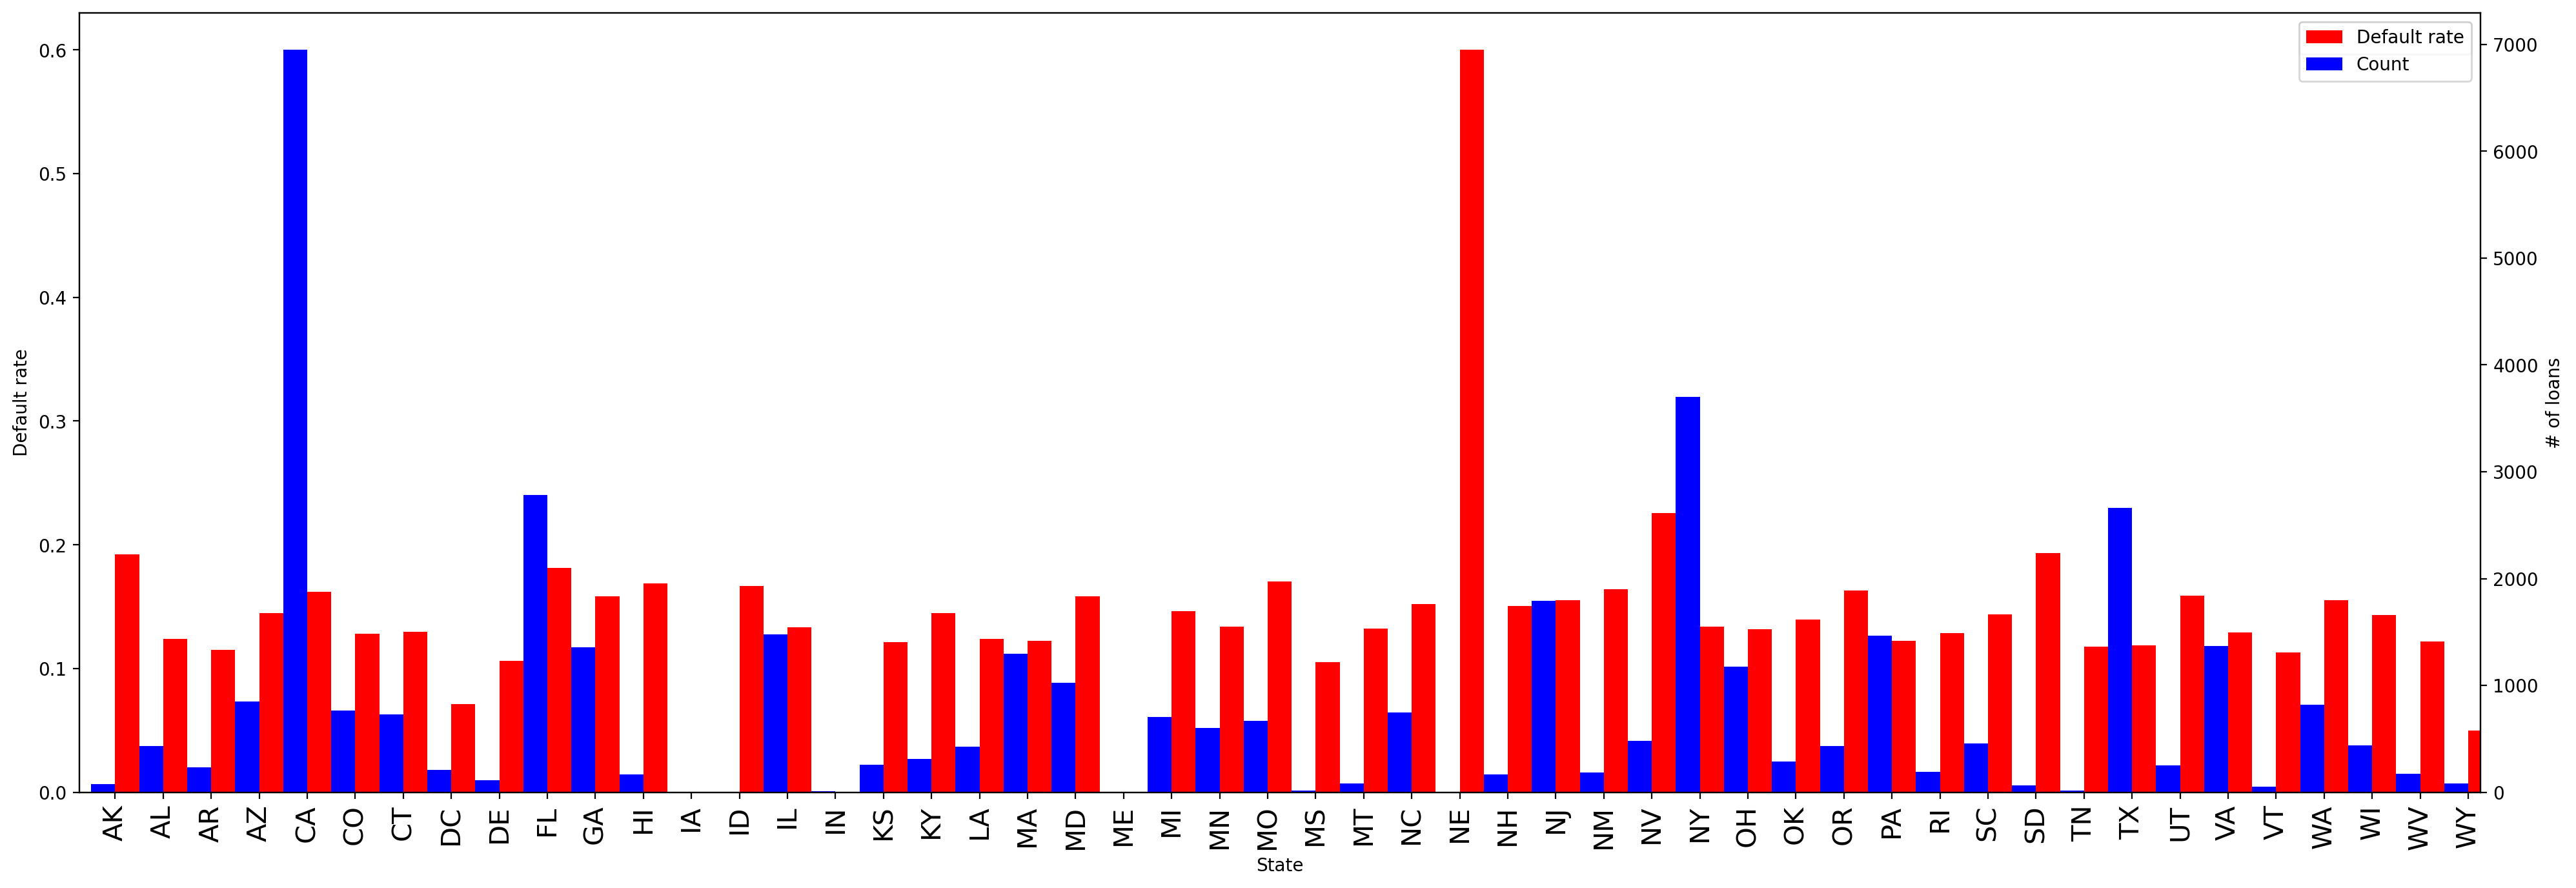

In [17]:
fig = plt.figure(figsize=(24,8),dpi=200)
state_df = loan_df.groupby('addr_state').agg({'default':['mean','count']})
ax=fig.add_subplot()
ax2 = ax.twinx()
ax.set_ylabel('Default rate')
for ax_c in (ax, ax2):
    ax_c.tick_params(axis='x',  labelsize=15)
l = state_df[('default','mean')].plot(kind='bar', color='red', ax=ax,  position=0,label='Default rate',legend=True)

m = state_df[('default','count')].plot(kind='bar', color='blue', ax=ax2, position=1,label='Count',legend=True)
ax.set_xlabel('State')
ax2.set_ylabel('# of loans')

handles,labels = [],[]
for ax in fig.axes:
    for h,l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)

plt.legend(handles,labels)

In [18]:
loan_df.dtypes

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                         int64
int_rate                   float64
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
url                         object
desc                        object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
mths_since_last_delinq     float64
mths_since_last_reco

In [19]:
loan_df.issue_d

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
5        Dec-11
          ...  
39712    Jul-07
39713    Jul-07
39714    Jul-07
39715    Jul-07
39716    Jun-07
Name: issue_d, Length: 38577, dtype: object

In [20]:
loan_df['issue_year'] = pd.to_datetime(loan_df.issue_d,format='%b-%y').dt.year
loan_df['issue_month'] = pd.to_datetime(loan_df.issue_d,format='%b-%y').dt.month
loan_df['earliest_cr_line_year'] = pd.to_datetime(loan_df.issue_d,format='%b-%y').dt.year

<AxesSubplot:ylabel='Density'>

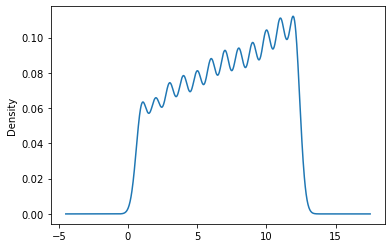

In [21]:
loan_df['issue_month'].plot(kind='kde')


Some variables aren't available during loan application. Removing those variables

In [22]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies', 'default',
       'sub_grade_no', 'issue_year', 'issue_month', 'earliest_cr_line_year'],
      dtype='object')

In [23]:
drop_cols=['id', 'member_id','funded_amnt', 'funded_amnt_inv','issue_d', 'revol_bal', 'revol_util','out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d']

In [24]:
loan_df2 = loan_df.drop(drop_cols, axis=1)

In [25]:
loan_df2.dtypes

loan_amnt                   int64
term                        int64
int_rate                  float64
installment               float64
grade                      object
sub_grade                  object
emp_title                  object
emp_length                 object
home_ownership             object
annual_inc                float64
verification_status        object
loan_status                object
url                        object
desc                       object
purpose                    object
title                      object
zip_code                   object
addr_state                 object
dti                       float64
delinq_2yrs                 int64
earliest_cr_line           object
inq_last_6mths              int64
mths_since_last_delinq    float64
mths_since_last_record    float64
open_acc                    int64
pub_rec                     int64
total_acc                   int64
pub_rec_bankruptcies      float64
default                     int64
sub_grade_no  

In [26]:
corr=loan_df2[['delinq_2yrs','dti','default','int_rate']].corr()

<AxesSubplot:>

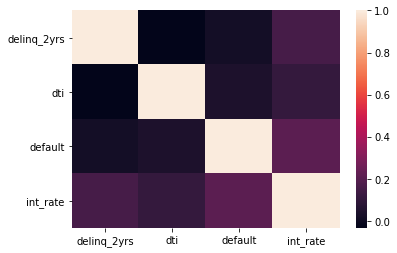

In [27]:
sns.heatmap(corr)

<AxesSubplot:>

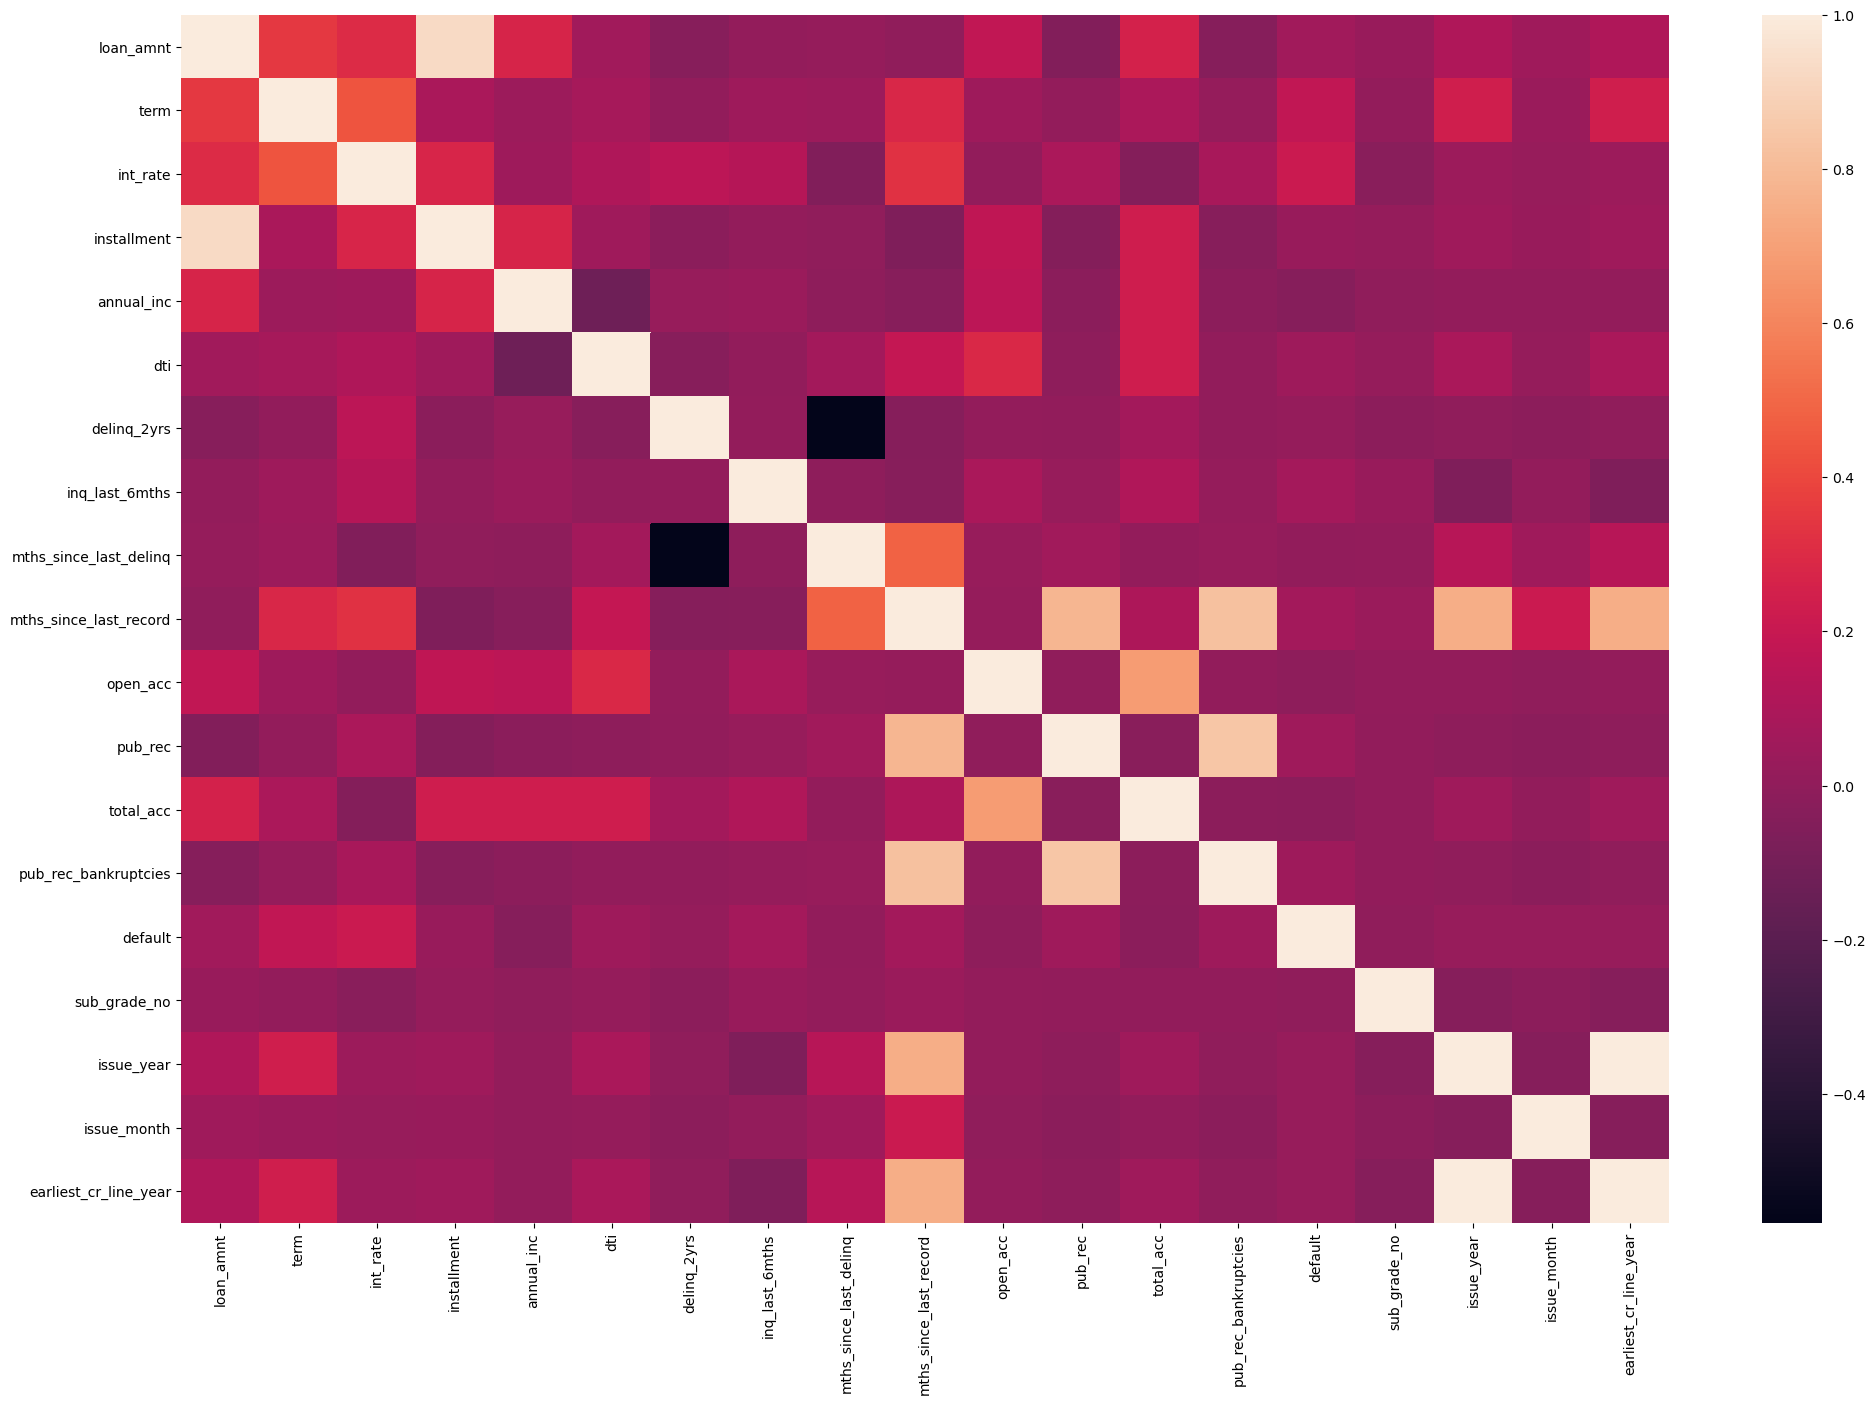

In [28]:
plt.figure(figsize=(24,16),dpi=100)
sns.heatmap(loan_df2.select_dtypes(['int64','float64']).corr())

In [29]:
loan_df2.dtypes

loan_amnt                   int64
term                        int64
int_rate                  float64
installment               float64
grade                      object
sub_grade                  object
emp_title                  object
emp_length                 object
home_ownership             object
annual_inc                float64
verification_status        object
loan_status                object
url                        object
desc                       object
purpose                    object
title                      object
zip_code                   object
addr_state                 object
dti                       float64
delinq_2yrs                 int64
earliest_cr_line           object
inq_last_6mths              int64
mths_since_last_delinq    float64
mths_since_last_record    float64
open_acc                    int64
pub_rec                     int64
total_acc                   int64
pub_rec_bankruptcies      float64
default                     int64
sub_grade_no  

In [30]:
loan_df2.title.unique()

array(['Computer', 'bike', 'real estate business', ...,
       'Retiring credit card debt', 'MBA Loan Consolidation', 'JAL Loan'],
      dtype=object)

<AxesSubplot:xlabel='delinq_2yrs', ylabel='default'>

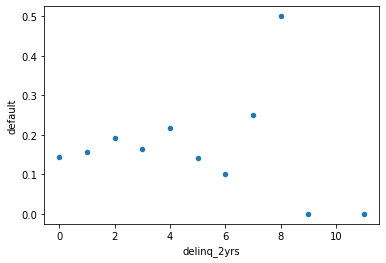

In [31]:
loan_df2.groupby('delinq_2yrs')['default'].mean().reset_index().plot.scatter(x='delinq_2yrs',y='default')

In [48]:
loan_df2.groupby('delinq_2yrs').agg({'default':['mean','count']})

default       
                 mean  count
delinq_2yrs                 
0            0.143547  34386
1            0.158092   3207
2            0.193165    673
3            0.165094    212
4            0.216667     60
5            0.142857     21
6            0.100000     10
7            0.250000      4
8            0.500000      2
9            0.000000      1
11           0.000000      1

In [32]:
for x in loan_df2.columns:
    if len(loan_df2[x].unique())<=2:
        print(x,loan_df2[x].unique())

term [36 60]
loan_status ['Fully Paid' 'Charged Off']
default [0 1]


In [33]:
loan_df2.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'total_acc', 'pub_rec_bankruptcies', 'default',
       'sub_grade_no', 'issue_year', 'issue_month', 'earliest_cr_line_year'],
      dtype='object')

In [34]:
loan_df2.drop(['emp_title','url', 'desc', 'title','zip_code','earliest_cr_line','mths_since_last_delinq', 'mths_since_last_record','open_acc', 'pub_rec', 'total_acc'],axis=1, inplace=True)

In [35]:
loan_df2.dtypes

loan_amnt                  int64
term                       int64
int_rate                 float64
installment              float64
grade                     object
sub_grade                 object
emp_length                object
home_ownership            object
annual_inc               float64
verification_status       object
loan_status               object
purpose                   object
addr_state                object
dti                      float64
delinq_2yrs                int64
inq_last_6mths             int64
pub_rec_bankruptcies     float64
default                    int64
sub_grade_no               int64
issue_year                 int64
issue_month                int64
earliest_cr_line_year      int64
dtype: object

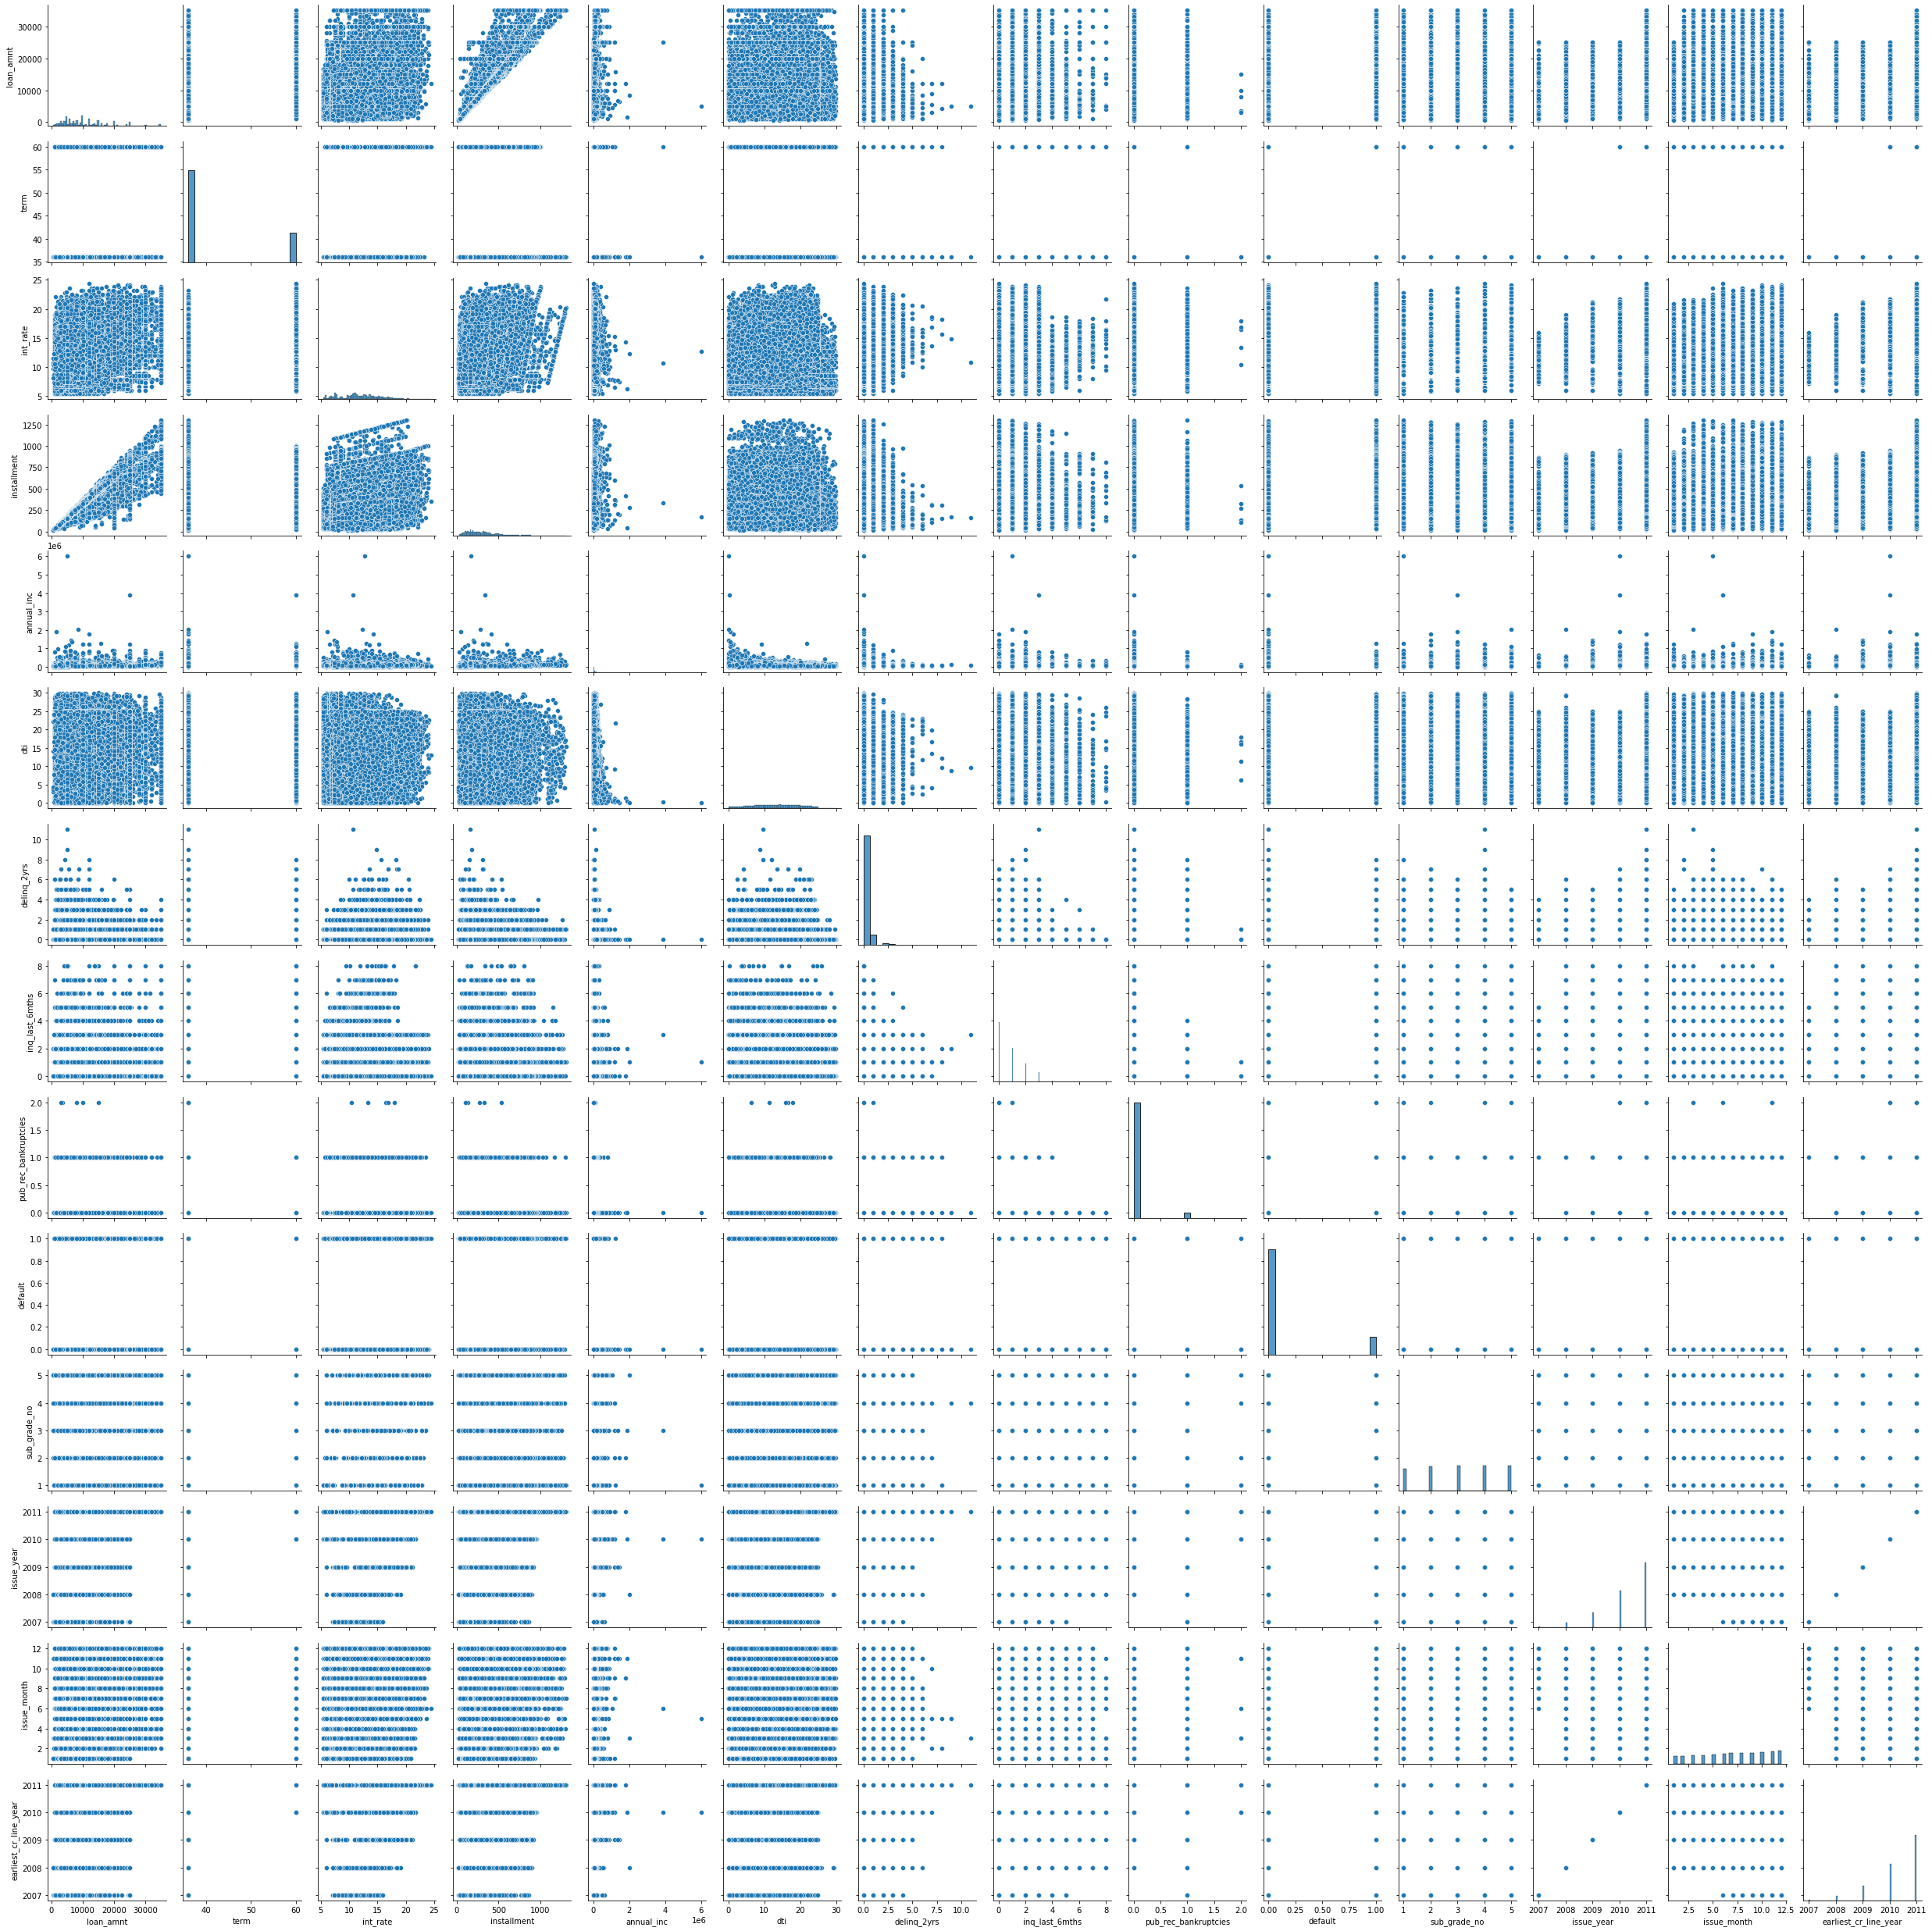

In [36]:
sns.pairplot(data=loan_df2)

<AxesSubplot:>

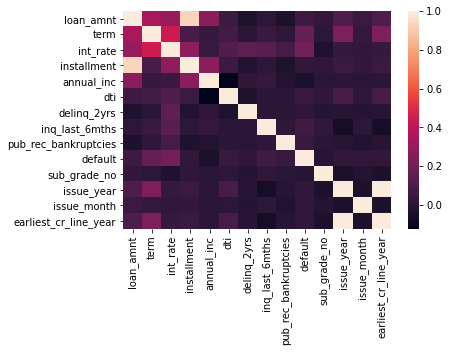

In [37]:
sns.heatmap(loan_df2.corr())

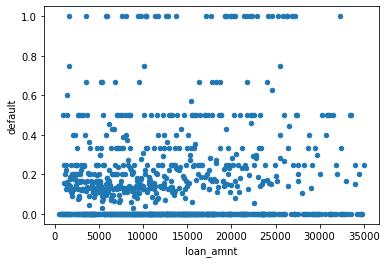

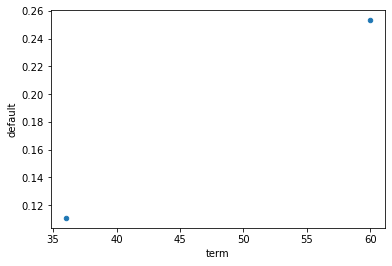

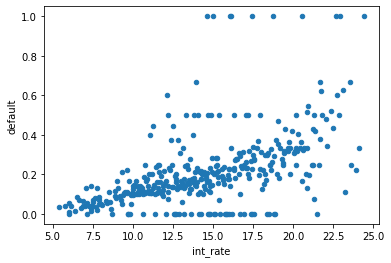

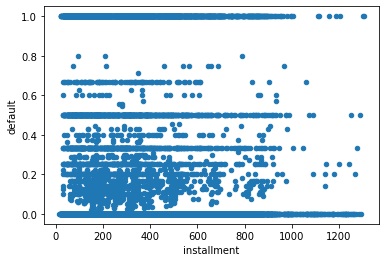

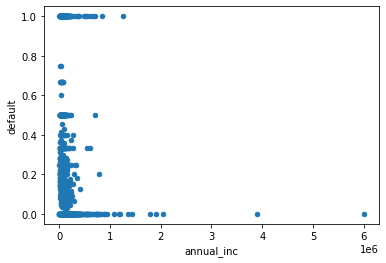

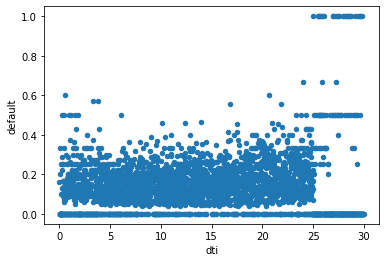

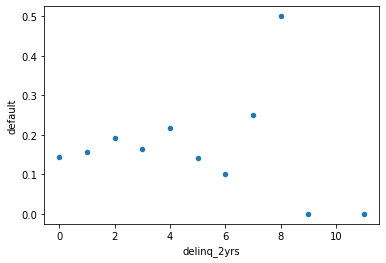

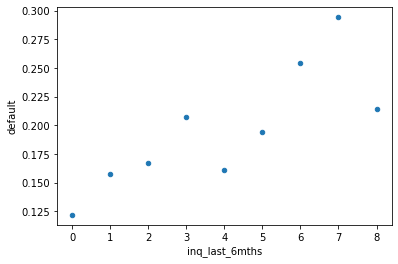

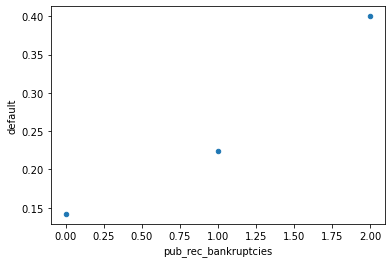

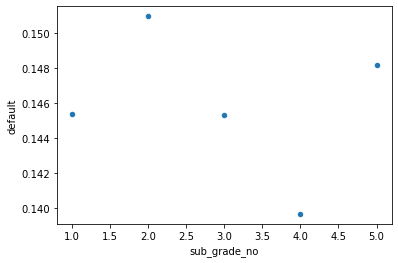

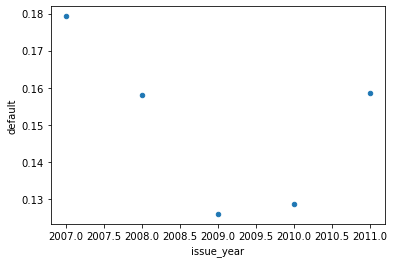

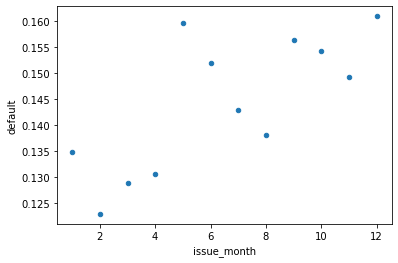

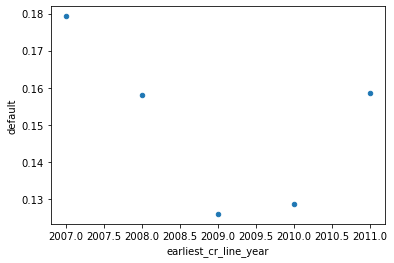

In [38]:
for col in loan_df2.select_dtypes(['int64','float64']).columns:
    if col!='default':
        loan_df2.groupby(col)['default'].mean().reset_index().plot.scatter(x=col,y='default')

grade
sub_grade
emp_length
home_ownership
verification_status
loan_status
purpose
addr_state


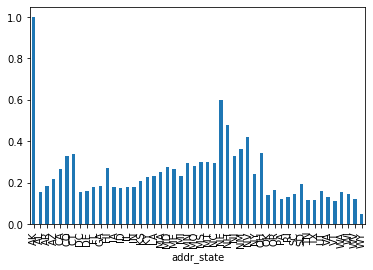

In [39]:
for col in loan_df2.select_dtypes('object').columns:
    print (col)
    loan_df2.groupby(col)['default'].mean().plot.bar()


In [40]:
loan_df2.select_dtypes('object').columns

Index(['grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'purpose', 'addr_state'],
      dtype='object')

<AxesSubplot:xlabel='home_ownership'>

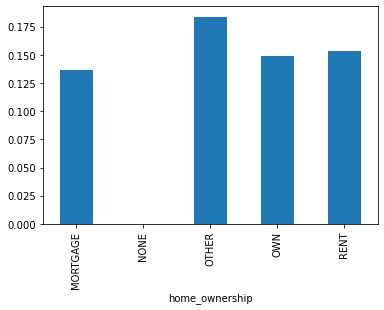

In [41]:
loan_df2.groupby('home_ownership')['default'].mean().plot.bar()

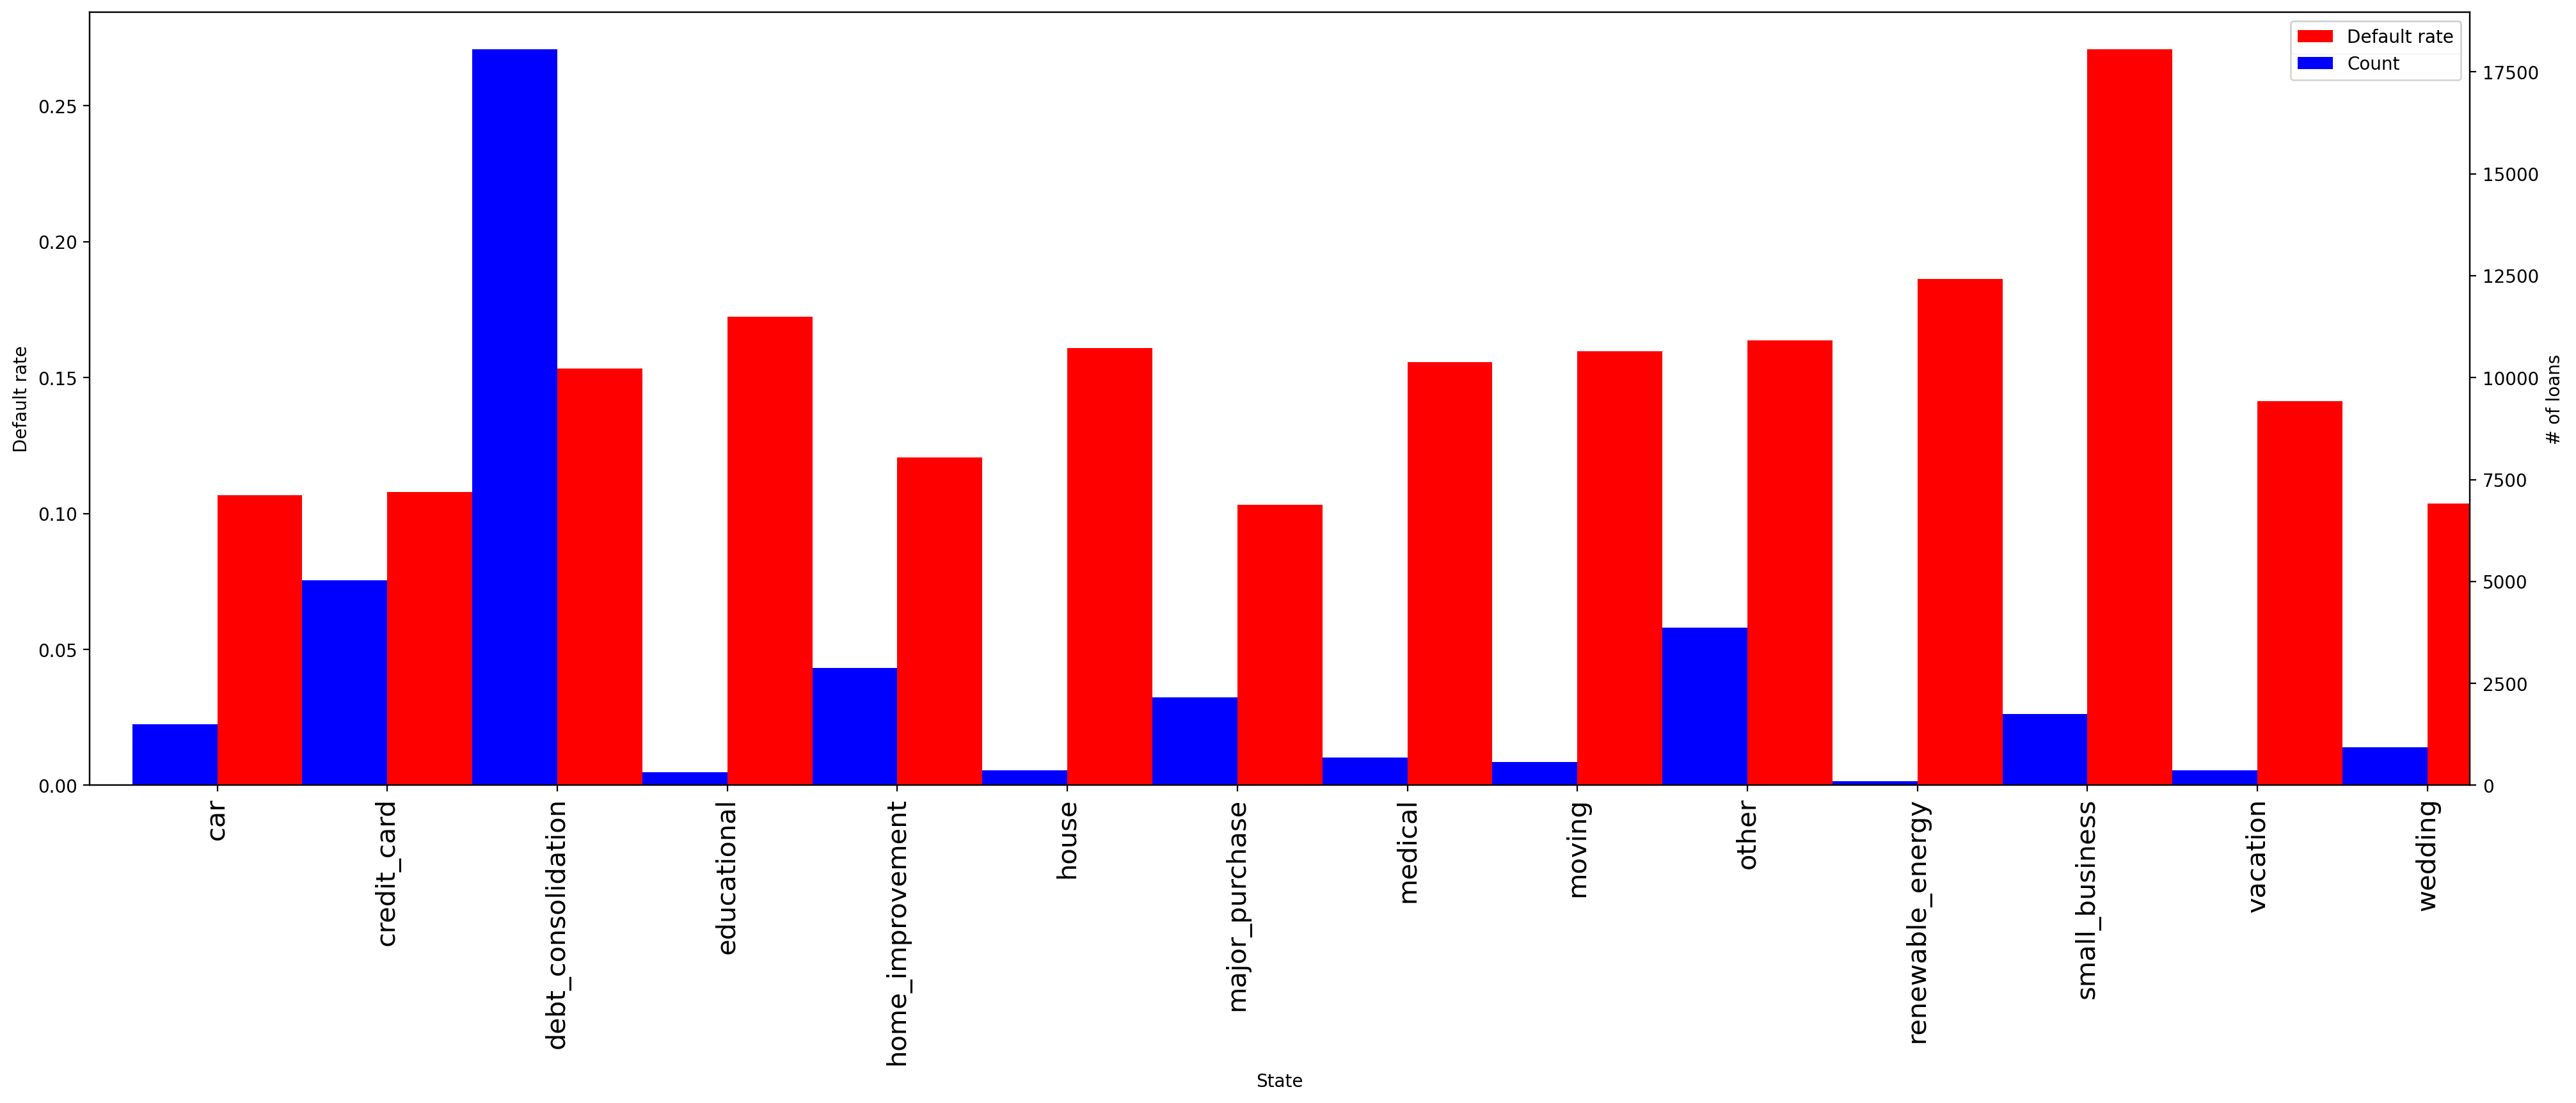

In [42]:
fig = plt.figure(figsize=(24,8),dpi=200)
purpose_df = loan_df2.groupby('purpose').agg({'default':['mean','count']})
ax=fig.add_subplot()
ax2 = ax.twinx()
ax.set_ylabel('Default rate')
for ax_c in (ax, ax2):
    ax_c.tick_params(axis='x',  labelsize=15)
l = purpose_df[('default','mean')].plot(kind='bar', color='red', ax=ax,  position=0,label='Default rate',linewidth=1,legend=True)

m = purpose_df[('default','count')].plot(kind='bar', color='blue', ax=ax2, position=1,label='Count',linewidth=1,legend=True)
ax.set_xlabel('State')
ax2.set_ylabel('# of loans')

handles,labels = [],[]
for ax in fig.axes:
    for h,l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)

plt.legend(handles,labels)


<AxesSubplot:xlabel='home_ownership'>

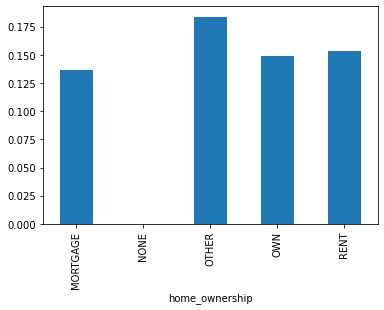

In [43]:
loan_df2.groupby('home_ownership')['default'].mean().plot.bar()

<AxesSubplot:xlabel='verification_status'>

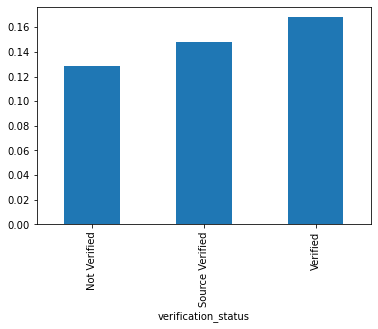

In [44]:
loan_df2.groupby('verification_status')['default'].mean().plot.bar()

<AxesSubplot:xlabel='verification_status'>

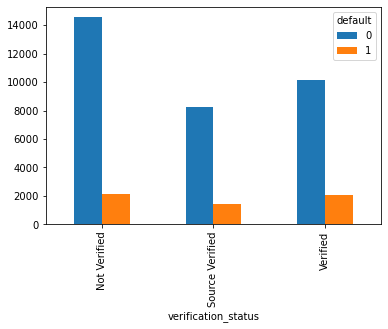

In [45]:
loan_df2.groupby(['verification_status','default'])['loan_amnt'].count().unstack().plot.bar()

<AxesSubplot:xlabel='home_ownership'>

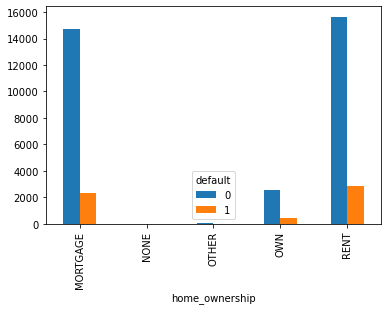

In [46]:
loan_df2.groupby(['home_ownership','default'])['loan_amnt'].count().unstack().plot.bar()

In [47]:
loan_df2.earliest_cr_line_year.unique()

array([2011, 2010, 2009, 2008, 2007])

In [49]:
loan_df2['mnth_dti'] = loan_df2['installment']/(loan_df2.annual_inc/12)

<AxesSubplot:xlabel='mnth_dti', ylabel='default'>

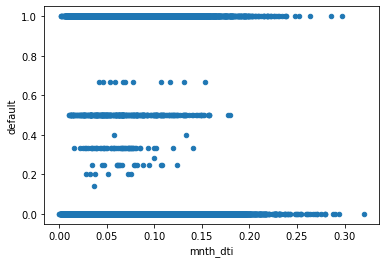

In [50]:
loan_df2.groupby('mnth_dti')['default'].mean().reset_index().plot.scatter(x='mnth_dti',y='default')

In [54]:
loan_df2['mdti_bin'] = pd.cut(loan_df2.mnth_dti,10)

<AxesSubplot:xlabel='mdti_bin'>

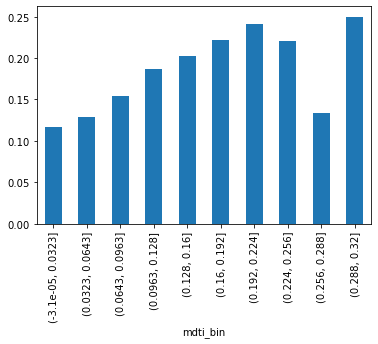

In [55]:
loan_df2.groupby('mdti_bin')['default'].mean().plot.bar()

In [56]:
loan_df2['dti_bin'] = pd.cut(loan_df2.dti,10)

<AxesSubplot:xlabel='dti_bin'>

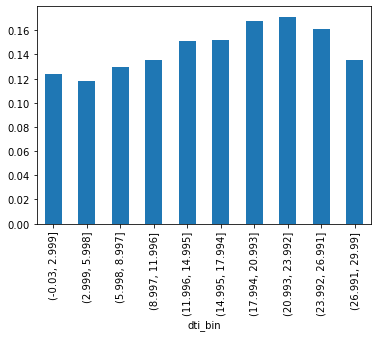

In [57]:
loan_df2.groupby('dti_bin')['default'].mean().plot.bar()